# ENEM data extraction

The National Secondary Education Examination (Enem) was first implemented in 1998, with the objective of evaluating the academic performance of students at the end of basic education. In 2009, the exam improved its methodology and started to be used as a mechanism for accessing higher education. 

Enem grades can be used to access the Unified Selection System (Sisu) and the University for All Program (ProUni). They are also accepted in more than 50 Portuguese higher education institutions. In addition, Enem participants can apply for student financing in government programs such as the Student Financing Fund (Fies). The Enem results also enable the development of studies and educational indicators.

Anyone who has already completed high school or is completing the stage can take the Enem for access to higher education.

In [4]:
# Importing the libraries
import dask.dataframe as dd
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os

In [2]:
# Creating the folder to extract the data locally
os.makedirs("./enem2019", exist_ok=True)

In [4]:
%%time
# Downloading the content from the url (using stream so we dont lose the connection)
url = "https://download.inep.gov.br/microdados/microdados_enem_2019.zip"

filebytes = BytesIO(requests.get(url, stream=True).content)

Wall time: 4min 41s


In [5]:
%%time
# Extracting the zip
myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./enem2019")

Wall time: 38.6 s


In [40]:
# Reading file
enem = dd.read_csv("./enem2019/DADOS/MICRODADOS_ENEM_2019.csv", 
                   sep=";", 
                   decimal=",", 
                   encoding="latin1",
                   dtype={'CO_MUNICIPIO_NASCIMENTO': 'float64',
                   'CO_UF_NASCIMENTO': 'float64',
                   'NO_MUNICIPIO_ESC': 'object',
                   'SG_UF_ESC': 'object',
                   'NU_IDADE': 'float64'})

In [41]:
# Taking a look in the data set
enem.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B
5,190001782198,2019,5107602,Rondonópolis,51,MT,37.0,M,2,2,...,B,A,A,B,A,A,E,A,B,B
6,190001421548,2019,2924009,Paulo Afonso,29,BA,22.0,F,1,3,...,A,A,A,B,A,A,B,A,A,A
7,190001595657,2019,3550308,São Paulo,35,SP,20.0,M,1,3,...,B,A,A,B,A,A,C,A,A,B
8,190001592264,2019,3550308,São Paulo,35,SP,20.0,F,1,1,...,B,A,A,B,A,A,B,B,A,A
9,190001592266,2019,3550308,São Paulo,35,SP,17.0,M,1,1,...,B,A,A,B,A,B,C,B,B,B


In [42]:
# Some additional information
enem.info()
dict(enem.dtypes)

<class 'dask.dataframe.core.DataFrame'>
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: object(45), float64(21), int64(70)

{'NU_INSCRICAO': dtype('int64'),
 'NU_ANO': dtype('int64'),
 'CO_MUNICIPIO_RESIDENCIA': dtype('int64'),
 'NO_MUNICIPIO_RESIDENCIA': dtype('O'),
 'CO_UF_RESIDENCIA': dtype('int64'),
 'SG_UF_RESIDENCIA': dtype('O'),
 'NU_IDADE': dtype('float64'),
 'TP_SEXO': dtype('O'),
 'TP_ESTADO_CIVIL': dtype('int64'),
 'TP_COR_RACA': dtype('int64'),
 'TP_NACIONALIDADE': dtype('int64'),
 'CO_MUNICIPIO_NASCIMENTO': dtype('float64'),
 'NO_MUNICIPIO_NASCIMENTO': dtype('O'),
 'CO_UF_NASCIMENTO': dtype('float64'),
 'SG_UF_NASCIMENTO': dtype('O'),
 'TP_ST_CONCLUSAO': dtype('int64'),
 'TP_ANO_CONCLUIU': dtype('int64'),
 'TP_ESCOLA': dtype('int64'),
 'TP_ENSINO': dtype('float64'),
 'IN_TREINEIRO': dtype('int64'),
 'CO_ESCOLA': dtype('float64'),
 'CO_MUNICIPIO_ESC': dtype('float64'),
 'NO_MUNICIPIO_ESC': dtype('O'),
 'CO_UF_ESC': dtype('float64'),
 'SG_UF_ESC': dtype('O'),
 'TP_DEPENDENCIA_ADM_ESC': dtype('float64'),
 'TP_LOCALIZACAO_ESC': dtype('float64'),
 'TP_SIT_FUNC_ESC': dtype('float64'),
 'IN_BAIXA_VISA

In [43]:
# Filtering MG
mg = enem.loc[enem.SG_UF_RESIDENCIA == "MG"]
mg.head(5)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B
14,190001237803,2019,3170206,Uberlândia,31,MG,30.0,F,1,2,...,A,A,A,B,A,A,B,A,A,A
25,190001237804,2019,3124104,Esmeraldas,31,MG,27.0,M,1,3,...,A,A,A,B,A,B,C,A,A,A
32,190001237805,2019,3118304,Conselheiro Lafaiete,31,MG,22.0,F,1,1,...,B,A,B,C,B,A,E,A,B,B
38,190001237806,2019,3162922,São Joaquim de Bicas,31,MG,23.0,F,1,4,...,B,A,A,B,B,A,C,A,B,B


In [45]:
%%time
# Writing data to file
mg.to_parquet('./enem2019/enem2019mg.parquet', 
              engine='pyarrow')

Wall time: 7min 53s


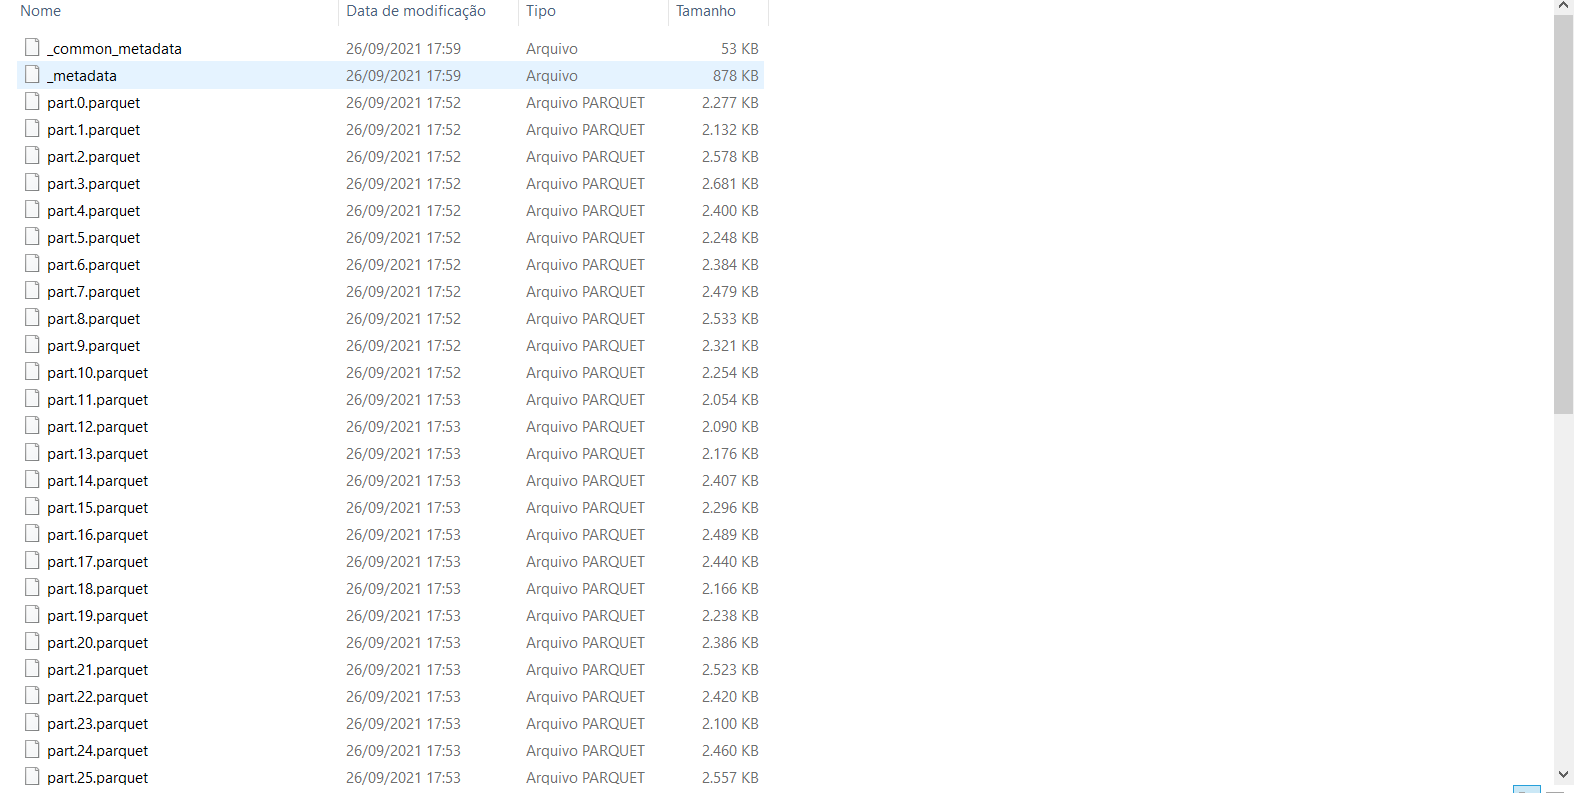

### After reading and saving just what is necessary, we can read the files.
This approach improves the performance.

In [ ]:
# Reading MG data stored previously
mg = dd.read_parquet('./enem2019/enem2019mg.parquet')

1. Qual é a média da nota em matemática de todos os alunos mineiros?

In [56]:
mg.NU_NOTA_MT.astype(float).mean().compute()

546.7962076512166

2. Qual é a média da nota em Linguagens e Códigos de todos os alunos mineiros?

In [57]:
mg['NU_NOTA_LC'].astype(float).mean().compute()

531.2155500475449

3. Qual é a média da nota em Ciências Humanas dos alunos do sexo FEMININO mineiros?

In [8]:
mg.loc[mg.TP_SEXO == 'F']['NU_NOTA_CH'].astype(float).mean().compute()

515.1270983575309

4. Qual é a média da nota em Ciências Humanas dos alunos do sexo MASCULINO?

In [10]:
mg.loc[mg.TP_SEXO == 'M']['NU_NOTA_CH'].astype(float).mean().compute()

529.6982704731432

5. Qual é a média da nota em Matemática dos alunos do sexo FEMININO que moram na cidade de Montes Claros?

In [19]:
mg.loc[
    (mg.TP_SEXO == 'F') &
    (mg.NO_MUNICIPIO_RESIDENCIA == 'Montes Claros') 
].NU_NOTA_MT.astype(float).mean().compute()

525.4776724249903

6. Qual é a média da nota em Matemática dos alunos do município de Sabará que possuem TV por assinatura na residência?

In [20]:
mg.loc[
    (mg.NO_MUNICIPIO_RESIDENCIA == 'Sabará') &
    (mg.Q021 == 'B')
].NU_NOTA_MT.astype(float).mean().compute()

543.2927556818182

7. Qual é a média da nota em Ciências Humanas dos alunos mineiros que possuem dois fornos micro-ondas em casa?

In [21]:
mg.loc[mg.Q016 == 'C'].NU_NOTA_CH.astype(float).mean().compute()

557.2765986394558

8. Qual é a nota média em Matemática dos alunos mineiros cuja mãe completou a pós-graduação?

In [22]:
mg.loc[mg.Q002 == 'G'].NU_NOTA_MT.astype(float).mean().compute()

620.007062070987

9. Qual é a nota média em Matemática dos alunos de Belo Horizonte e de Conselheiro Lafaiete?

In [35]:
mg.loc[
    (mg.NO_MUNICIPIO_RESIDENCIA == ('Belo Horizonte' or 'Conselheiro Lafaiete')) 
].NU_NOTA_MT.astype(float).mean().compute()

578.6497548241435

10. Qual é a nota média em Ciências Humanas dos alunos mineiros que moram sozinhos?

In [36]:
mg.loc[mg.Q005 == 1].NU_NOTA_CH.astype(float).mean().compute()

534.4573388609219

11. Qual é a nota média em Ciências Humanas dos alunos mineiros cujo pai completou pós-graduação e possuem renda familiar entre 8.982,01 e 9.980,00 reais?

In [38]:
mg.loc[
    (mg.Q006 == 'M') &
    (mg.Q001 == 'G')
].NU_NOTA_CH.astype(float).mean().compute()

586.7231663685152

12. Qual é a nota média em Matemática dos alunos do sexo Feminino que moram em Lavras e escolheram “Espanhol” como língua estrangeira?

In [41]:
mg.loc[
    (mg.TP_SEXO == 'F') &
    (mg.NO_MUNICIPIO_RESIDENCIA == 'Lavras') &
    (mg.TP_LINGUA == 1)
].NU_NOTA_MT.astype(float).mean().compute()

510.80950782997763

13. Qual é a nota média em Matemática dos alunos do sexo Masculino que moram em Ouro Preto?

In [42]:
mg.loc[
    (mg.TP_SEXO == 'M') &
    (mg.NO_MUNICIPIO_RESIDENCIA == 'Ouro Preto')
].NU_NOTA_MT.astype(float).mean().compute()

555.0832520325202

14. Qual é a nota média em Ciências Humanas dos alunos surdos?

In [46]:
mg.loc[
    (mg.IN_SURDEZ == 1) 
#    (mg.IN_SURDO_CEGUEIRA == 1) 
].NU_NOTA_CH.astype(float).mean().compute()

435.387962962963

15. Qual é a nota média em Matemática dos alunos do sexo FEMININO, que moram em Belo Horizonte, Sabará, Nova Lima e Betim e possuem dislexia?

In [49]:
mg.loc[
    (mg.TP_SEXO == 'F') &
    (mg.NO_MUNICIPIO_RESIDENCIA == ('Belo Horizonte' or 'Sabará' or 'Nova Lima' or 'Betim')) &
    (mg.IN_DISLEXIA == 1)
].NU_NOTA_MT.astype(float).mean().compute()

577.4413793103448